Digital audio basics
Audio representation in computers

In [2]:
# import libraries for manipulating arrays and plotting graphs
import numpy as np
import matplotlib.pyplot as plt

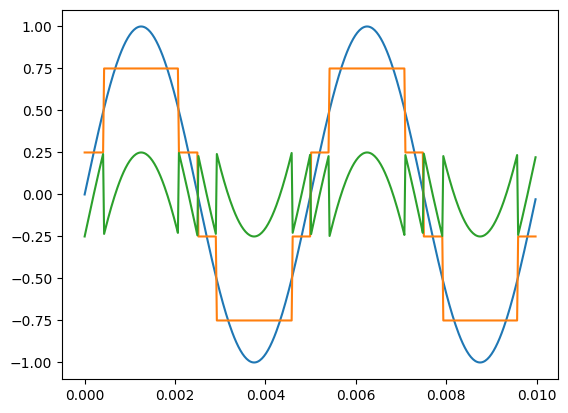

In [26]:
import time
import sounddevice as sd
# but the values of the audio samples per se are also digital
# the available values are defined by bitrate
sr = 44100
t = np.arange( sr )/sr
# set frequency
f = 200
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
fig = plt.figure()
# plot a small part
n = 441
plt.plot( t[:n] , s[:n] )
# assume 2-bit audio: 00, 01, 10, 11
s_2bit = np.round( np.interp( s, (-1, 1), (-0.5, 3.5) ) )
s_2bit = np.interp( s_2bit, (0, 3), (-1+1/4, 1-1/4) )
plt.plot( t[:n] , s_2bit[:n] )
quant_noise = s - s_2bit
plt.plot( t[:n] , quant_noise[:n] )
# np.iinfo(np.int16).min

# remove comments to listen:
# initial audio
sd.play( s , sr )
time.sleep(1.5)
# 2bit quantized
sd.play( s_2bit , sr )
time.sleep(1.5)
# residual noise
sd.play( quant_noise , sr )


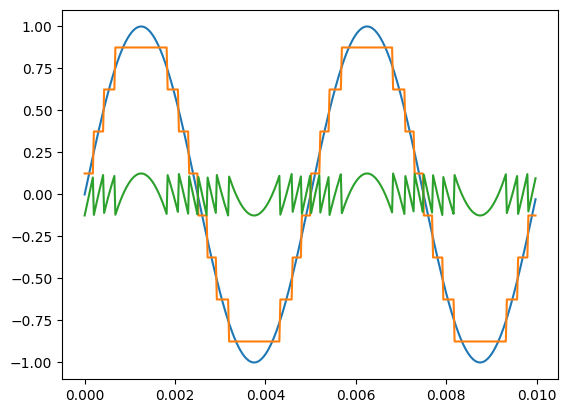

<IPython.core.display.Javascript object>

In [21]:
# assume n-bit audio
# set frequency
import time
f = 200
sr = 44100
t = np.arange( sr )/sr
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
bits_n = 3
s_nbit = np.round( np.interp( s, (-1, 1), (0-0.5, 2**bits_n-0.5) ) )
s_nbit = np.interp( s_nbit, (0, (2**bits_n)-1), (-1+1/2**bits_n, 1-1/2**bits_n) )
# np.iinfo(np.int16).min

# plot the first 0.01 seconds
fig = plt.figure()
plt.plot( t[:441] , s[:441] )
plt.plot( t[:441] , s_nbit[:441] )
plt.plot( t[:441] , quant_noise[:441] )
plt.show()

# just for running next cell
from IPython.display import Javascript
Javascript("var output_area = this; var cell_element = output_area.element.parents('.cell'); var cell_idx = Jupyter.notebook.get_cell_elements().index(cell_element); Jupyter.notebook.execute_cells([cell_idx+1]);")

Signal-to-noise ratio (SNR) indicates how much of the signal is "lost" or how much noise is added to the original signal by a process (e.g., long cable leakage, or poor microphone quality, or quantization). In the case of quantization, SNR is measured by dividing the dBs of the "green" line with the dBs of the blue line.

In [16]:
sd.play( s , sr )
time.sleep(1.5)
sd.play( s_nbit , sr )
time.sleep(1.5)
sd.play( quant_noise , sr )